In [1]:
import pandas as pd
import numpy
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, StandardScaler
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import accuracy_score, classification_report
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation, Dropout,Flatten
from keras.layers import BatchNormalization


2025-11-01 04:34:15.206953: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-01 04:34:15.216435: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-01 04:34:15.219800: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-01 04:34:15.227670: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761951855.241020    8111 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761951855.24

In [2]:
features = ['frame.interface_id',
 'frame.dlt',
 'frame.offset_shift',
 'frame.time_epoch',
 'frame.time_delta',
 'frame.time_delta_displayed',
 'frame.time_relative',
 'frame.len',
 'frame.cap_len',
 'frame.marked',
 'frame.ignored',
 'radiotap.version',
 'radiotap.pad',
 'radiotap.length',
 'radiotap.present.tsft',
 'radiotap.present.flags',
 'radiotap.present.rate',
 'radiotap.present.channel',
 'radiotap.present.fhss',
 'radiotap.present.dbm_antsignal',
 'radiotap.present.dbm_antnoise',
 'radiotap.present.lock_quality',
 'radiotap.present.tx_attenuation',
 'radiotap.present.db_tx_attenuation',
 'radiotap.present.dbm_tx_power',
 'radiotap.present.antenna',
 'radiotap.present.db_antsignal',
 'radiotap.present.db_antnoise',
 'radiotap.present.rxflags',
 'radiotap.present.xchannel',
 'radiotap.present.mcs',
 'radiotap.present.ampdu',
 'radiotap.present.vht',
 'radiotap.present.reserved',
 'radiotap.present.rtap_ns',
 'radiotap.present.vendor_ns',
 'radiotap.present.ext',
 'radiotap.mactime',
 'radiotap.flags.cfp',
 'radiotap.flags.preamble',
 'radiotap.flags.wep',
 'radiotap.flags.frag',
 'radiotap.flags.fcs',
 'radiotap.flags.datapad',
 'radiotap.flags.badfcs',
 'radiotap.flags.shortgi',
 'radiotap.datarate',
 'radiotap.channel.freq',
 'radiotap.channel.type.turbo',
 'radiotap.channel.type.cck',
 'radiotap.channel.type.ofdm',
 'radiotap.channel.type.2ghz',
 'radiotap.channel.type.5ghz',
 'radiotap.channel.type.passive',
 'radiotap.channel.type.dynamic',
 'radiotap.channel.type.gfsk',
 'radiotap.channel.type.gsm',
 'radiotap.channel.type.sturbo',
 'radiotap.channel.type.half',
 'radiotap.channel.type.quarter',
 'radiotap.dbm_antsignal',
 'radiotap.antenna',
 'radiotap.rxflags.badplcp',
 'wlan.fc.type_subtype',
 'wlan.fc.version',
 'wlan.fc.type',
 'wlan.fc.subtype',
 'wlan.fc.ds',
 'wlan.fc.frag',
 'wlan.fc.retry',
 'wlan.fc.pwrmgt',
 'wlan.fc.moredata',
 'wlan.fc.protected',
 'wlan.fc.order',
 'wlan.duration',
 'wlan.ra',
 'wlan.da',
 'wlan.ta',
 'wlan.sa',
 'wlan.bssid',
 'wlan.frag',
 'wlan.seq',
 'wlan.bar.type',
 'wlan.ba.control.ackpolicy',
 'wlan.ba.control.multitid',
 'wlan.ba.control.cbitmap',
 'wlan.bar.compressed.tidinfo',
 'wlan.ba.bm',
 'wlan.fcs_good',
 'wlan_mgt.fixed.capabilities.ess',
 'wlan_mgt.fixed.capabilities.ibss',
 'wlan_mgt.fixed.capabilities.cfpoll.ap',
 'wlan_mgt.fixed.capabilities.privacy',
 'wlan_mgt.fixed.capabilities.preamble',
 'wlan_mgt.fixed.capabilities.pbcc',
 'wlan_mgt.fixed.capabilities.agility',
 'wlan_mgt.fixed.capabilities.spec_man',
 'wlan_mgt.fixed.capabilities.short_slot_time',
 'wlan_mgt.fixed.capabilities.apsd',
 'wlan_mgt.fixed.capabilities.radio_measurement',
 'wlan_mgt.fixed.capabilities.dsss_ofdm',
 'wlan_mgt.fixed.capabilities.del_blk_ack',
 'wlan_mgt.fixed.capabilities.imm_blk_ack',
 'wlan_mgt.fixed.listen_ival',
 'wlan_mgt.fixed.current_ap',
 'wlan_mgt.fixed.status_code',
 'wlan_mgt.fixed.timestamp',
 'wlan_mgt.fixed.beacon',
 'wlan_mgt.fixed.aid',
 'wlan_mgt.fixed.reason_code',
 'wlan_mgt.fixed.auth.alg',
 'wlan_mgt.fixed.auth_seq',
 'wlan_mgt.fixed.category_code',
 'wlan_mgt.fixed.htact',
 'wlan_mgt.fixed.chanwidth',
 'wlan_mgt.fixed.fragment',
 'wlan_mgt.fixed.sequence',
 'wlan_mgt.tagged.all',
 'wlan_mgt.ssid',
 'wlan_mgt.ds.current_channel',
 'wlan_mgt.tim.dtim_count',
 'wlan_mgt.tim.dtim_period',
 'wlan_mgt.tim.bmapctl.multicast',
 'wlan_mgt.tim.bmapctl.offset',
 'wlan_mgt.country_info.environment',
 'wlan_mgt.rsn.version',
 'wlan_mgt.rsn.gcs.type',
 'wlan_mgt.rsn.pcs.count',
 'wlan_mgt.rsn.akms.count',
 'wlan_mgt.rsn.akms.type',
 'wlan_mgt.rsn.capabilities.preauth',
 'wlan_mgt.rsn.capabilities.no_pairwise',
 'wlan_mgt.rsn.capabilities.ptksa_replay_counter',
 'wlan_mgt.rsn.capabilities.gtksa_replay_counter',
 'wlan_mgt.rsn.capabilities.mfpr',
 'wlan_mgt.rsn.capabilities.mfpc',
 'wlan_mgt.rsn.capabilities.peerkey',
 'wlan_mgt.tcprep.trsmt_pow',
 'wlan_mgt.tcprep.link_mrg',
 'wlan.wep.iv',
 'wlan.wep.key',
 'wlan.wep.icv',
 'wlan.tkip.extiv',
 'wlan.ccmp.extiv',
 'wlan.qos.tid',
 'wlan.qos.priority',
 'wlan.qos.eosp',
 'wlan.qos.ack',
 'wlan.qos.amsdupresent',
 'wlan.qos.buf_state_indicated1',
 'wlan.qos.bit4',
 'wlan.qos.txop_dur_req',
 'wlan.qos.buf_state_indicated2',
 'data.len',
 'class']

In [3]:
awid = pd.read_csv("AWID-CLS-R-Trn/1", header=None, names=features, low_memory=False)

In [4]:
awid.head()

,frame.interface_id,frame.dlt,frame.offset_shift,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,frame.marked,...,wlan.qos.priority,wlan.qos.eosp,wlan.qos.ack,wlan.qos.amsdupresent,wlan.qos.buf_state_indicated1,wlan.qos.bit4,wlan.qos.txop_dur_req,wlan.qos.buf_state_indicated2,data.len,class
0,0,?,0.0,1.393661e+09,0.000000,0.000000,0.000000,261,261,0,...,?,?,?,?,?,?,?,?,?,normal
1,0,?,0.0,1.393661e+09,0.024271,0.024271,0.024271,185,185,0,...,?,?,?,?,?,?,?,?,?,normal
2,0,?,0.0,1.393661e+09,0.001631,0.001631,0.025902,185,185,0,...,?,?,?,?,?,?,?,?,?,normal
3,0,?,0.0,1.393661e+09,0.055325,0.055325,0.081227,159,159,0,...,?,?,?,?,?,?,?,?,?,normal
4,0,?,0.0,1.393661e+09,0.000415,0.000415,0.081642,54,54,0,...,?,?,?,?,?,?,?,?,?,normal


In [5]:
awid.isna().sum()

frame.interface_id               0
frame.dlt                        0
frame.offset_shift               0
frame.time_epoch                 0
frame.time_delta                 0
                                ..
wlan.qos.bit4                    0
wlan.qos.txop_dur_req            0
wlan.qos.buf_state_indicated2    0
data.len                         0
class                            0
Length: 155, dtype: int64

In [6]:
awid.describe()

,frame.interface_id,frame.offset_shift,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,frame.marked,frame.ignored,...,radiotap.datarate,wlan.fc.version,wlan.fc.type,wlan.fc.subtype,wlan.fc.frag,wlan.fc.retry,wlan.fc.pwrmgt,wlan.fc.moredata,wlan.fc.protected,wlan.fc.order
count,1795575.0,1795575.0,1.795575e+06,1.795575e+06,1.795575e+06,1.795575e+06,1.795575e+06,1.795575e+06,1795575.0,1795575.0,...,1.795575e+06,1795575.0,1.795575e+06,1.795575e+06,1.795575e+06,1.795575e+06,1.795575e+06,1.795575e+06,1.795575e+06,1795575.0
mean,0.0,0.0,1.393663e+09,2.004690e-03,2.004690e-03,1.870294e+03,5.153149e+02,5.153149e+02,0.0,0.0,...,2.513950e+01,0.0,1.272582e+00,8.499055e+00,3.748103e-04,1.271080e-01,2.325216e-02,1.772691e-03,4.932927e-01,0.0
std,0.0,0.0,8.674448e+02,6.379536e-03,6.379536e-03,8.674448e+02,6.649245e+02,6.649245e+02,0.0,0.0,...,2.373590e+01,0.0,8.198060e-01,4.173015e+00,1.935639e-02,3.330940e-01,1.507034e-01,4.206602e-02,4.999551e-01,0.0
min,0.0,0.0,1.393661e+09,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+01,4.000000e+01,0.0,0.0,...,1.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,0.0,0.0,1.393662e+09,3.150000e-04,3.150000e-04,1.027875e+03,4.000000e+01,4.000000e+01,0.0,0.0,...,1.000000e+00,0.0,1.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,0.0,0.0,1.393663e+09,5.490000e-04,5.490000e-04,1.902614e+03,1.120000e+02,1.120000e+02,0.0,0.0,...,2.400000e+01,0.0,2.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
75%,0.0,0.0,1.393664e+09,1.113000e-03,1.113000e-03,2.524325e+03,1.552000e+03,1.552000e+03,0.0,0.0,...,5.400000e+01,0.0,2.000000e+00,1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.0
max,0.0,0.0,1.393665e+09,3.502630e-01,3.502630e-01,3.599571e+03,1.570000e+03,1.570000e+03,0.0,0.0,...,5.400000e+01,0.0,2.000000e+00,1.300000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0


In [4]:
present_features = [
    'frame.len',
    'frame.cap_len',
    'radiotap.dbm_antsignal',
    'radiotap.channel.freq',
    'wlan.da',
    'wlan.sa',
    'wlan.bssid'
    'frame.time_delta', 'frame.time_relative', 'radiotap.present.channel','wlan_mgt.ds.current_channel','class' 
]


In [5]:
df = awid[[
    'frame.len',
    'frame.cap_len',
    'radiotap.dbm_antsignal',
    'radiotap.channel.freq',
    'wlan.da',
    'wlan.sa',
    'wlan.bssid',
    'frame.time_delta', 'frame.time_relative', 'radiotap.present.channel','wlan_mgt.ds.current_channel','class' 
]]

In [10]:
df.head()

,frame.len,frame.cap_len,radiotap.dbm_antsignal,radiotap.channel.freq,wlan.da,wlan.sa,wlan.bssid,frame.time_delta,frame.time_relative,radiotap.present.channel,wlan_mgt.ds.current_channel,class
0,261,261,-47,2437,ff:ff:ff:ff:ff:ff,b0:48:7a:e2:62:23,b0:48:7a:e2:62:23,0.000000,0.000000,1,6,normal
1,185,185,-47,2437,ff:ff:ff:ff:ff:ff,38:22:9d:ae:c5:65,38:22:9d:ae:c5:65,0.024271,0.024271,1,6,normal
2,185,185,-64,2437,ff:ff:ff:ff:ff:ff,38:22:9d:c4:8d:28,38:22:9d:c4:8d:28,0.001631,0.025902,1,6,normal
3,159,159,-32,2437,ff:ff:ff:ff:ff:ff,00:13:33:87:62:6d,00:13:33:87:62:6d,0.055325,0.081227,1,6,normal
4,54,54,-21,2437,28:c6:8e:86:d3:d6,00:25:bc:ed:07:cf,28:c6:8e:86:d3:d6,0.000415,0.081642,1,?,normal


In [11]:
df.describe()

,frame.len,frame.cap_len,frame.time_delta,frame.time_relative,radiotap.present.channel
count,1.795575e+06,1.795575e+06,1.795575e+06,1.795575e+06,1.795575e+06
mean,5.153149e+02,5.153149e+02,2.004690e-03,1.870294e+03,9.995656e-01
std,6.649245e+02,6.649245e+02,6.379536e-03,8.674448e+02,2.083777e-02
min,4.000000e+01,4.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e+01,4.000000e+01,3.150000e-04,1.027875e+03,1.000000e+00
50%,1.120000e+02,1.120000e+02,5.490000e-04,1.902614e+03,1.000000e+00
75%,1.552000e+03,1.552000e+03,1.113000e-03,2.524325e+03,1.000000e+00
max,1.570000e+03,1.570000e+03,3.502630e-01,3.599571e+03,1.000000e+00


In [12]:
df.isna().sum()

frame.len                      0
frame.cap_len                  0
radiotap.dbm_antsignal         0
radiotap.channel.freq          0
wlan.da                        0
wlan.sa                        0
wlan.bssid                     0
frame.time_delta               0
frame.time_relative            0
radiotap.present.channel       0
wlan_mgt.ds.current_channel    0
class                          0
dtype: int64

In [13]:
df['class'].value_counts()

class
normal           1633190
injection          65379
impersonation      48522
flooding           48484
Name: count, dtype: int64

In [16]:
df.shape


(1795575, 12)

In [18]:
df.describe()

,frame.len,frame.cap_len,frame.time_delta,frame.time_relative,radiotap.present.channel
count,1.795575e+06,1.795575e+06,1.795575e+06,1.795575e+06,1.795575e+06
mean,5.153149e+02,5.153149e+02,2.004690e-03,1.870294e+03,9.995656e-01
std,6.649245e+02,6.649245e+02,6.379536e-03,8.674448e+02,2.083777e-02
min,4.000000e+01,4.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e+01,4.000000e+01,3.150000e-04,1.027875e+03,1.000000e+00
50%,1.120000e+02,1.120000e+02,5.490000e-04,1.902614e+03,1.000000e+00
75%,1.552000e+03,1.552000e+03,1.113000e-03,2.524325e+03,1.000000e+00
max,1.570000e+03,1.570000e+03,3.502630e-01,3.599571e+03,1.000000e+00


In [6]:
df.replace({"?":None},inplace=True)
null_common=df.columns[df.isnull().mean()>=0.51]

/tmp/ipykernel_8111/1381863475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({"?":None},inplace=True)


In [7]:
df.shape

(1795575, 12)

In [8]:
df.drop(null_common,axis=1,inplace=True)
df.dropna(inplace=True)

/tmp/ipykernel_8111/3566983614.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(null_common,axis=1,inplace=True)
/tmp/ipykernel_8111/3566983614.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [9]:
df.shape

(1339406, 11)

In [10]:
df.head()

,frame.len,frame.cap_len,radiotap.dbm_antsignal,radiotap.channel.freq,wlan.da,wlan.sa,wlan.bssid,frame.time_delta,frame.time_relative,radiotap.present.channel,class
0,261,261,-47,2437,ff:ff:ff:ff:ff:ff,b0:48:7a:e2:62:23,b0:48:7a:e2:62:23,0.000000,0.000000,1,normal
1,185,185,-47,2437,ff:ff:ff:ff:ff:ff,38:22:9d:ae:c5:65,38:22:9d:ae:c5:65,0.024271,0.024271,1,normal
2,185,185,-64,2437,ff:ff:ff:ff:ff:ff,38:22:9d:c4:8d:28,38:22:9d:c4:8d:28,0.001631,0.025902,1,normal
3,159,159,-32,2437,ff:ff:ff:ff:ff:ff,00:13:33:87:62:6d,00:13:33:87:62:6d,0.055325,0.081227,1,normal
4,54,54,-21,2437,28:c6:8e:86:d3:d6,00:25:bc:ed:07:cf,28:c6:8e:86:d3:d6,0.000415,0.081642,1,normal


In [11]:
df.describe()

,frame.len,frame.cap_len,frame.time_delta,frame.time_relative,radiotap.present.channel
count,1.339406e+06,1.339406e+06,1.339406e+06,1.339406e+06,1339406.0
mean,6.771728e+02,6.771728e+02,2.435200e-03,1.842787e+03,1.0
std,6.997003e+02,6.997003e+02,6.827733e-03,8.370012e+02,0.0
min,5.400000e+01,5.400000e+01,0.000000e+00,0.000000e+00,1.0
25%,9.800000e+01,9.800000e+01,4.430000e-04,1.103988e+03,1.0
50%,1.590000e+02,1.590000e+02,7.790000e-04,1.894319e+03,1.0
75%,1.552000e+03,1.552000e+03,1.393000e-03,2.374825e+03,1.0
max,1.570000e+03,1.570000e+03,3.502630e-01,3.599571e+03,1.0


In [12]:
df['class'].value_counts()

class
normal           1177021
injection          65379
impersonation      48522
flooding           48484
Name: count, dtype: int64

In [13]:
for col in df.columns:
    df[col]=pd.to_numeric(df[col],errors='ignore')

/tmp/ipykernel_8111/1451147112.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col]=pd.to_numeric(df[col],errors='ignore')
/tmp/ipykernel_8111/1451147112.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=pd.to_numeric(df[col],errors='ignore')


In [14]:
df.select_dtypes(['number']).head()

,frame.len,frame.cap_len,radiotap.dbm_antsignal,radiotap.channel.freq,frame.time_delta,frame.time_relative,radiotap.present.channel
0,261,261,-47,2437,0.000000,0.000000,1
1,185,185,-47,2437,0.024271,0.024271,1
2,185,185,-64,2437,0.001631,0.025902,1
3,159,159,-32,2437,0.055325,0.081227,1
4,54,54,-21,2437,0.000415,0.081642,1


In [15]:
X_train, y_train = df.select_dtypes(['number']), df['class']


In [16]:
y_train.value_counts()

class
normal           1177021
injection          65379
impersonation      48522
flooding           48484
Name: count, dtype: int64

In [17]:
X_train.shape

(1339406, 7)

In [18]:
y_train.shape

(1339406,)

In [19]:
y_train.describe()

count     1339406
unique          4
top        normal
freq      1177021
Name: class, dtype: object

In [20]:
awid_test = pd.read_csv("AWID-CLS-R-Tst/1", header=None, names=features,low_memory=False)


In [21]:
df_test = awid_test[[
    'frame.len',
    'frame.cap_len',
    'radiotap.dbm_antsignal',
    'radiotap.channel.freq',
    'wlan.da',
    'wlan.sa',
    'wlan.bssid',
    'frame.time_delta', 'frame.time_relative', 'radiotap.present.channel','wlan_mgt.ds.current_channel','class' 
]]

In [22]:
df_test.isna().sum()
df_test.replace({"?":None}, inplace=True)
test_null_column=df_test.columns[df_test.isnull().mean() >= 0.5]
df_test.drop(test_null_column, axis=1, inplace=True)
df_test.dropna(inplace=True)

for col in df_test.columns:
    df_test[col]=pd.to_numeric(df_test[col], errors='ignore')


X_test, y_test = df_test.select_dtypes(['number']), df_test['class']


/tmp/ipykernel_8111/3248615901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.replace({"?":None}, inplace=True)
/tmp/ipykernel_8111/3248615901.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(test_null_column, axis=1, inplace=True)
/tmp/ipykernel_8111/3248615901.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.dropna(inplace=True)
/tmp/ipykernel_8111/3248615901.py:8: FutureWarning: errors='ignore

In [23]:
X_test

,frame.len,frame.cap_len,radiotap.dbm_antsignal,radiotap.channel.freq,frame.time_delta,frame.time_relative,radiotap.present.channel
0,1552,1552,-25,2437,0.000000,0.000000,1
1,1552,1552,-25,2437,0.001056,0.001056,1
4,1552,1552,-26,2437,0.001842,0.003195,1
5,1552,1552,-25,2437,0.006015,0.009210,1
6,1552,1552,-25,2437,0.000940,0.010150,1
...,...,...,...,...,...,...,...
575637,124,124,-25,2437,0.003354,1200.261305,1
575639,261,261,-58,2437,0.005485,1200.267433,1
575640,124,124,-25,2437,0.008112,1200.275545,1
575641,1524,1524,-25,2437,0.006147,1200.281692,1


In [24]:
X_train

,frame.len,frame.cap_len,radiotap.dbm_antsignal,radiotap.channel.freq,frame.time_delta,frame.time_relative,radiotap.present.channel
0,261,261,-47,2437,0.000000,0.000000,1
1,185,185,-47,2437,0.024271,0.024271,1
2,185,185,-64,2437,0.001631,0.025902,1
3,159,159,-32,2437,0.055325,0.081227,1
4,54,54,-21,2437,0.000415,0.081642,1
...,...,...,...,...,...,...,...
1795568,185,185,-42,2437,0.001502,3599.491300,1
1795569,54,54,-15,2437,0.031399,3599.522699,1
1795571,148,148,-58,2437,0.005067,3599.527772,1
1795572,54,54,-27,2437,0.010242,3599.538014,1


In [25]:
X_test.describe()

,frame.len,frame.cap_len,radiotap.dbm_antsignal,radiotap.channel.freq,frame.time_delta,frame.time_relative,radiotap.present.channel
count,389185.000000,389185.000000,389185.000000,389185.000000,389185.000000,389185.000000,389185.0
mean,750.096779,750.096779,-28.924828,2437.006519,0.002811,462.059846,1.0
std,702.647485,702.647485,10.424826,0.730345,0.007074,394.752445,0.0
min,54.000000,54.000000,-78.000000,2412.000000,0.000000,0.000000,1.0
25%,124.000000,124.000000,-33.000000,2437.000000,0.000423,89.374507,1.0
50%,185.000000,185.000000,-24.000000,2437.000000,0.000771,283.662451,1.0
75%,1552.000000,1552.000000,-23.000000,2437.000000,0.001479,865.988089,1.0
max,1570.000000,1570.000000,-9.000000,2484.000000,0.344335,1200.289872,1.0


In [26]:
y_test.value_counts()

class
normal           346285
impersonation     20079
injection         16682
flooding           6139
Name: count, dtype: int64

In [27]:
y_train.value_counts()

class
normal           1177021
injection          65379
impersonation      48522
flooding           48484
Name: count, dtype: int64

In [28]:
sc=StandardScaler()
sc.fit(X_train)
scaled_x_training=sc.transform(X_train)

In [29]:
sc1=StandardScaler()
sc1.fit(X_test)
scaled_x_testing=sc.transform(X_test)

In [30]:
X_train

,frame.len,frame.cap_len,radiotap.dbm_antsignal,radiotap.channel.freq,frame.time_delta,frame.time_relative,radiotap.present.channel
0,261,261,-47,2437,0.000000,0.000000,1
1,185,185,-47,2437,0.024271,0.024271,1
2,185,185,-64,2437,0.001631,0.025902,1
3,159,159,-32,2437,0.055325,0.081227,1
4,54,54,-21,2437,0.000415,0.081642,1
...,...,...,...,...,...,...,...
1795568,185,185,-42,2437,0.001502,3599.491300,1
1795569,54,54,-15,2437,0.031399,3599.522699,1
1795571,148,148,-58,2437,0.005067,3599.527772,1
1795572,54,54,-27,2437,0.010242,3599.538014,1


In [31]:
print(X_train.dtypes)

frame.len                     int64
frame.cap_len                 int64
radiotap.dbm_antsignal        int64
radiotap.channel.freq         int64
frame.time_delta            float64
frame.time_relative         float64
radiotap.present.channel      int64
dtype: object


In [32]:
print(scaled_x_training)
print(scaled_x_training.dtype)

[[-0.59478751 -0.59478751 -1.86907426 ... -0.35666311 -2.20165511
   0.        ]
 [-0.70340549 -0.70340549 -1.86907426 ...  3.19810505 -2.20162611
   0.        ]
 [-0.70340549 -0.70340549 -3.52985779 ... -0.11778433 -2.20162417
   0.        ]
 ...
 [-0.75628529 -0.75628529 -2.9436989  ...  0.38545754  2.0988512
   0.        ]
 [-0.89062858 -0.89062858  0.08478873 ...  1.14339603  2.09886344
   0.        ]
 [-0.74056427 -0.74056427 -1.08752906 ...  4.51552664  2.09890319
   0.        ]]
float64


In [33]:
encoder=LabelEncoder()
encoded_y=encoder.fit_transform(y_train)
enc_y_test=encoder.fit_transform(y_test)


In [34]:
encoder.classes_

array(['flooding', 'impersonation', 'injection', 'normal'], dtype=object)

In [35]:
enc_y_test

array([3, 3, 3, ..., 3, 3, 3])

In [36]:
cat_y_train=to_categorical(encoded_y)
cat_y_train

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [37]:
cat_y_test=to_categorical(enc_y_test)
cat_y_test

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [116]:
model2 = Sequential()
model2.add(Dense(128, input_shape=(scaled_x_training.shape[1],), activation='relu'))
model2.add(Dropout(0.4))
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.4))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(4, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

/home/sriramchinmay/miniforge3/envs/workstation/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,460 (294.77 KB)

 Trainable params: 75,460 (294.77 KB)

 Non-trainable params: 0 (0.00 B)

In [117]:
class_weight_dict = {
    0: 30.0,  # flooding
    1: 30.0,  # impersonation  
    2: 25.0,  # injection
    3: 0.5    # normal
}

In [60]:
from keras.callbacks import EarlyStopping

In [100]:
from imblearn.over_sampling import SMOTE

In [101]:
y_labels=cat_y_train.argmax(axis=1)

In [102]:
smote=SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(scaled_x_training, y_labels)

In [103]:
y_resampled_cat=to_categorical(y_resampled,num_classes=4)

In [104]:
print("Original class distribution:", np.bincount(y_labels))
print("After SMOTE:", np.bincount(y_resampled))

Original class distribution: [  48484   48522   65379 1177021]
After SMOTE: [1177021 1177021 1177021 1177021]


In [118]:
earlystop=EarlyStopping(monitor='val_loss',min_delta=0,patience=5,verbose=1,restore_best_weights=True)

In [119]:
hist=model2.fit(x_resampled,y_resampled_cat,batch_size=64,validation_split=0.1,callbacks=[earlystop],epochs=30,verbose=1,class_weight=class_weight_dict)

Epoch 1/30
66208/66208 ━━━━━━━━━━━━━━━━━━━━ 125s 2ms/step - accuracy: 0.8419 - loss: 2.4078 - val_accuracy: 0.9968 - val_loss: 0.0124
Epoch 2/30
66208/66208 ━━━━━━━━━━━━━━━━━━━━ 125s 2ms/step - accuracy: 0.9254 - loss: 0.5953 - val_accuracy: 0.9971 - val_loss: 0.0121
Epoch 3/30
66208/66208 ━━━━━━━━━━━━━━━━━━━━ 127s 2ms/step - accuracy: 0.9357 - loss: 0.5073 - val_accuracy: 0.9973 - val_loss: 0.0101
Epoch 4/30
66208/66208 ━━━━━━━━━━━━━━━━━━━━ 129s 2ms/step - accuracy: 0.9363 - loss: 0.4882 - val_accuracy: 0.9974 - val_loss: 0.0087
Epoch 5/30
66208/66208 ━━━━━━━━━━━━━━━━━━━━ 125s 2ms/step - accuracy: 0.9420 - loss: 0.4326 - val_accuracy: 0.9975 - val_loss: 0.0073
Epoch 6/30
66208/66208 ━━━━━━━━━━━━━━━━━━━━ 117s 2ms/step - accuracy: 0.9435 - loss: 0.4034 - val_accuracy: 0.9971 - val_loss: 0.0162
Epoch 7/30
66208/66208 ━━━━━━━━━━━━━━━━━━━━ 119s 2ms/step - accuracy: 0.9461 - loss: 0.4014 - val_accuracy: 0.9973 - val_loss: 0.0098
Epoch 8/30
66208/66208 ━━━━━━━━━━━━━━━━━━━━ 117s 2ms/step - ac

In [120]:
loss, accuracy = model2.evaluate(x_resampled, y_resampled_cat)
print("Training accuracy:", accuracy)

147128/147128 ━━━━━━━━━━━━━━━━━━━━ 127s 863us/step - accuracy: 0.8957 - loss: 0.2785
Training accuracy: 0.9439578652381897


In [121]:
model2_loss,model2_accuracy=model2.evaluate(scaled_x_testing,cat_y_test)
print("Testing accuracy:", model2_accuracy)

12163/12163 ━━━━━━━━━━━━━━━━━━━━ 10s 850us/step - accuracy: 0.9471 - loss: 21.9854
Testing accuracy: 0.8578799366950989


In [122]:
print('Loss :{loss},\nAccuracy of DNN 2 : {accuracy}'.format(loss= model2_loss,accuracy=model2_accuracy))

Loss :31.43824577331543,
Accuracy of DNN 2 : 0.8578799366950989


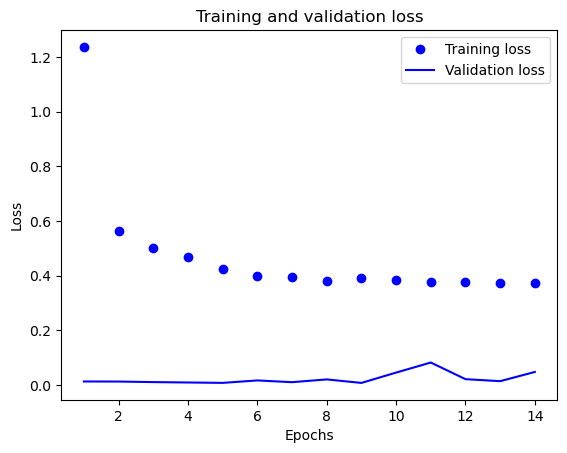

In [123]:
import matplotlib.pyplot as plt

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

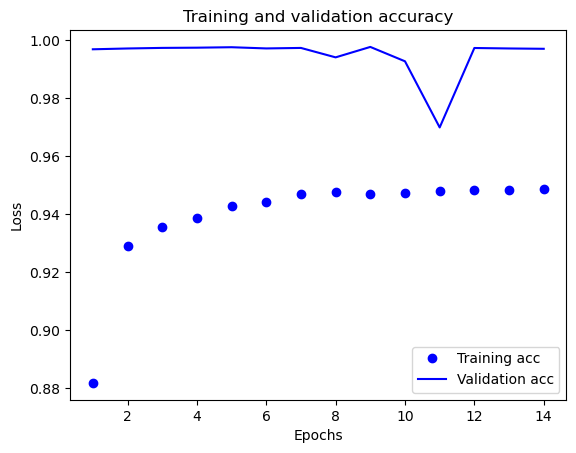

In [124]:
acc_values = hist.history['accuracy']
val_acc_values = hist.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [125]:
y_pred = model2.predict(scaled_x_testing)
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = cat_y_test.argmax(axis=1)

from sklearn.metrics import classification_report
print(classification_report(y_test_classes, y_pred_classes, 
                           target_names=['flooding', 'impersonation', 'injection', 'normal']))

12163/12163 ━━━━━━━━━━━━━━━━━━━━ 7s 558us/step
               precision    recall  f1-score   support

     flooding       0.02      0.13      0.04      6139
impersonation       0.00      0.00      0.00     20079
    injection       0.00      0.00      0.00     16682
       normal       0.94      0.96      0.95    346285

     accuracy                           0.86    389185
    macro avg       0.24      0.27      0.25    389185
 weighted avg       0.83      0.86      0.84    389185



In [127]:
print("Number of features:", scaled_x_training.shape[1])
print("Feature names (if available):", list(df.columns))

Number of features: 7
Feature names (if available): ['frame.len', 'frame.cap_len', 'radiotap.dbm_antsignal', 'radiotap.channel.freq', 'wlan.da', 'wlan.sa', 'wlan.bssid', 'frame.time_delta', 'frame.time_relative', 'radiotap.present.channel', 'class']


In [ ]:
for col in scaled_x_testing.columns[:5]:  # Check first 5 features
    print(f"\n{col} statistics by class:")
    print(df.groupby('class')[col].describe())


frame.len statistics by class:
                   count        mean         std   min    25%    50%     75%  \
class                                                                          
flooding         48484.0   75.203696   83.638935  56.0   56.0   56.0    56.0   
impersonation    48522.0   98.946107   10.304712  60.0   98.0   98.0    98.0   
injection        65379.0   99.405390   20.159666  65.0   98.0   98.0    98.0   
normal         1177021.0  757.899049  709.253468  54.0  124.0  185.0  1552.0   

                  max  
class                  
flooding        530.0  
impersonation   319.0  
injection       362.0  
normal         1570.0  

frame.cap_len statistics by class:
                   count        mean         std   min    25%    50%     75%  \
class                                                                          
flooding         48484.0   75.203696   83.638935  56.0   56.0   56.0    56.0   
impersonation    48522.0   98.946107   10.304712  60.0   98.0   98.

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    class_weight={0: 50, 1: 50, 2: 40, 3: 0.3},  
    random_state=42,
    n_jobs=-1
)

In [40]:
y_train_labels = cat_y_train.argmax(axis=1)
y_test_labels = cat_y_test.argmax(axis=1)

In [41]:
rf.fit(scaled_x_training, y_train_labels)

,n_estimators,200
,criterion,'gini'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [44]:
y_pred_rf = rf.predict(scaled_x_testing)
y_pred_proba = rf.predict_proba(scaled_x_testing)


In [45]:
# More aggressive threshold specifically for impersonation (class 1)
y_pred_adjusted = []
for probs in y_pred_proba:
    # Even lower threshold for impersonation
    if probs[1] > 0.05:  # If impersonation prob > 5%
        y_pred_adjusted.append(1)
    elif probs[0] > 0.1 or probs[2] > 0.1:  # Other attacks > 10%
        # Pick highest attack class
        attack_probs = [probs[0], probs[1], probs[2]]
        y_pred_adjusted.append(attack_probs.index(max(attack_probs)))
    else:
        y_pred_adjusted.append(3)  # normal

print(classification_report(cat_y_test.argmax(axis=1), y_pred_adjusted,
                           target_names=['flooding', 'impersonation', 'injection', 'normal']))

               precision    recall  f1-score   support

     flooding       0.51      0.67      0.58      6139
impersonation       0.78      0.06      0.12     20079
    injection       0.16      0.21      0.18     16682
       normal       0.96      0.99      0.98    346285

     accuracy                           0.91    389185
    macro avg       0.60      0.48      0.46    389185
 weighted avg       0.91      0.91      0.89    389185



In [46]:
import numpy as np

# Get actual impersonation samples from test set
impersonation_mask = (cat_y_test.argmax(axis=1) == 1)
impersonation_probs = y_pred_proba[impersonation_mask, 1]  # Their impersonation probabilities

print("Impersonation probability distribution for TRUE impersonation samples:")
print(f"Min: {impersonation_probs.min():.6f}")
print(f"Max: {impersonation_probs.max():.6f}")
print(f"Mean: {impersonation_probs.mean():.6f}")
print(f"Median: {np.median(impersonation_probs):.6f}")
print(f"75th percentile: {np.percentile(impersonation_probs, 75):.6f}")
print(f"95th percentile: {np.percentile(impersonation_probs, 95):.6f}")

Impersonation probability distribution for TRUE impersonation samples:
Min: 0.000000
Max: 0.235000
Mean: 0.009315
Median: 0.000000
75th percentile: 0.000000
95th percentile: 0.120000


In [47]:
df['class'].value_counts()

class
normal           1177021
injection          65379
impersonation      48522
flooding           48484
Name: count, dtype: int64

In [48]:
import pickle

# Save the Random Forest model
with open('intrusion_detection_model.pkl', 'wb') as f:
    pickle.dump(rf, f)

print("Model saved successfully!")

# To load it later:
# with open('intrusion_detection_model.pkl', 'rb') as f:
#     loaded_model = pickle.load(f)

Model saved successfully!


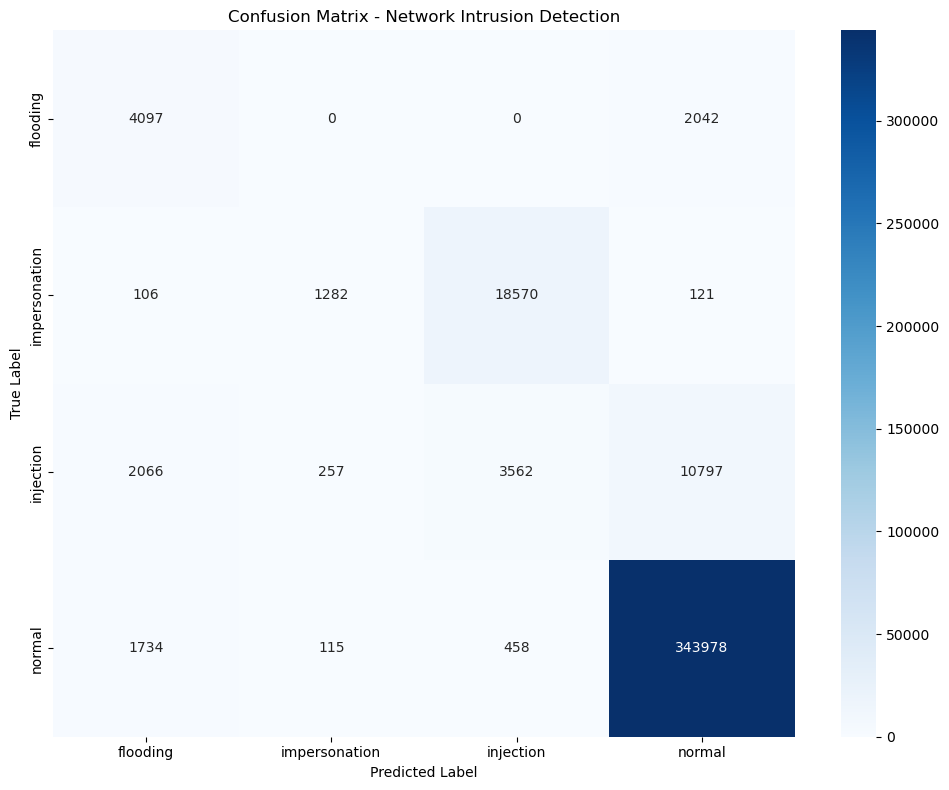

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(cat_y_test.argmax(axis=1), y_pred_adjusted)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['flooding', 'impersonation', 'injection', 'normal'],
            yticklabels=['flooding', 'impersonation', 'injection', 'normal'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix - Network Intrusion Detection')
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300)
plt.show()

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("="*60)
print("FINAL MODEL PERFORMANCE SUMMARY")
print("="*60)
print(f"Overall Accuracy: {accuracy_score(cat_y_test.argmax(axis=1), y_pred_adjusted):.4f}")
print(f"Macro Average Precision: {precision_score(cat_y_test.argmax(axis=1), y_pred_adjusted, average='macro'):.4f}")
print(f"Macro Average Recall: {recall_score(cat_y_test.argmax(axis=1), y_pred_adjusted, average='macro'):.4f}")
print(f"Macro Average F1-Score: {f1_score(cat_y_test.argmax(axis=1), y_pred_adjusted, average='macro'):.4f}")
print("\nWeighted Average (accounts for class imbalance):")
print(f"Weighted Precision: {precision_score(cat_y_test.argmax(axis=1), y_pred_adjusted, average='weighted'):.4f}")
print(f"Weighted Recall: {recall_score(cat_y_test.argmax(axis=1), y_pred_adjusted, average='weighted'):.4f}")
print(f"Weighted F1-Score: {f1_score(cat_y_test.argmax(axis=1), y_pred_adjusted, average='weighted'):.4f}")
print("="*60)

FINAL MODEL PERFORMANCE SUMMARY
Overall Accuracy: 0.9068
Macro Average Precision: 0.6021
Macro Average Recall: 0.4845
Macro Average F1-Score: 0.4643

Weighted Average (accounts for class imbalance):
Weighted Precision: 0.9123
Weighted Recall: 0.9068
Weighted F1-Score: 0.8935


In [51]:
with open('intrusion_detection_model.pkl', 'rb') as f:
    loaded_model=pickle.load(f)
        

In [54]:
prediction=y_pred_adjusted
probabilities=y_pred_proba

In [56]:
class_names = {0: 'flooding', 1: 'impersonation', 2: 'injection', 3: 'normal'}

In [ ]:
attack_count = 0

print("Attack Predictions (excluding normal):\n")
for i in range(0, len(prediction)):
    pred_class = prediction[i]
    if pred_class != 3:  
        confidence = probabilities[i][pred_class] * 100
        print(f'Packet: {i} -> Prediction: {class_names[pred_class]} (Confidence: {confidence:.2f}%)')
        attack_count += 1

print("\n" + "="*60)
print(f"Total Attack Predictions Displayed: {attack_count}")
print(f"Total Predictions: {len(prediction)}")


Attack Predictions (excluding normal):

Packet: 23224 -> Prediction: injection (Confidence: 21.00%)
Packet: 54684 -> Prediction: flooding (Confidence: 18.50%)
Packet: 97165 -> Prediction: flooding (Confidence: 11.00%)
Packet: 99120 -> Prediction: flooding (Confidence: 10.50%)
Packet: 101603 -> Prediction: flooding (Confidence: 10.50%)
Packet: 101652 -> Prediction: flooding (Confidence: 13.00%)
Packet: 101653 -> Prediction: flooding (Confidence: 11.50%)
Packet: 101654 -> Prediction: flooding (Confidence: 12.00%)
Packet: 101655 -> Prediction: flooding (Confidence: 11.50%)
Packet: 138773 -> Prediction: impersonation (Confidence: 10.50%)
Packet: 139047 -> Prediction: flooding (Confidence: 10.50%)
Packet: 141956 -> Prediction: flooding (Confidence: 13.00%)
Packet: 142082 -> Prediction: injection (Confidence: 32.50%)
Packet: 142083 -> Prediction: injection (Confidence: 33.00%)
Packet: 142084 -> Prediction: injection (Confidence: 34.00%)
Packet: 142085 -> Prediction: injection (Confidence: 34

In [ ]:

prediction = y_pred_adjusted
probabilities = y_pred_proba


class_names = {0: 'flooding', 1: 'impersonation', 2: 'injection', 3: 'normal'}


normal_count = sum(1 for p in prediction if p == 3)
attack_count = len(prediction) - normal_count
total = len(prediction)


normal_percent = (normal_count / total) * 100
attack_percent = (attack_count / total) * 100


print("\nTraffic Summary")
print("=" * 30)
print(f"Total Packets: {total}")
print(f"Normal Traffic: {normal_count} ({normal_percent:.2f}%)")
print(f"Attack Traffic: {attack_count} ({attack_percent:.2f}%)")
print("=" * 30)



Traffic Summary
Total Packets: 389185
Normal Traffic: 356938 (91.71%)
Attack Traffic: 32247 (8.29%)


In [2]:
import re


def process_packets(log_text: str, total_duration: float = 60.0):
    """
    Parse packet log text, extract key fields, and assign synthetic timing information.

    Args:
        log_text (str): Raw packet dump text.
        total_duration (float): Total capture duration in seconds.

    Returns:
        pandas.DataFrame: Table of packets with time-relative and time-delta columns.
    """
    # Split log into packets
    packets_raw = re.split(r'---- PACKET ----', log_text)
    packets = []

    for pkt in packets_raw:
        if not pkt.strip():
            continue

        # Extract fields
        rssi = re.search(r'RSSI:\s*(-?\d+)', pkt)
        channel = re.search(r'Channel:\s*(\d+)', pkt)
        length = re.search(r'Len:\s*(\d+)', pkt)
        da = re.search(r'DA:\s*([\dA-F:]+)', pkt, re.I)
        sa = re.search(r'SA:\s*([\dA-F:]+)', pkt, re.I)
        bssid = re.search(r'BSSID:\s*([\dA-F:]+)', pkt, re.I)

        packets.append({
            "radiotap.dbm_antsignal": int(rssi.group(1)) if rssi else None,
            "radiotap.channel.freq": int(channel.group(1)) if channel else None,
            "frame.len": int(length.group(1)) if length else None,
            "frame.cap_len": int(length.group(1)) if length else None,
            "wlan.da": da.group(1) if da else None,
            "wlan.sa": sa.group(1) if sa else None,
            "wlan.bssid": bssid.group(1) if bssid else None,
        })

    # Convert to DataFrame
    df = pd.DataFrame(packets)
    n = len(df)

    # Generate time features
    if n > 1:
        df["frame.time_relative"] = np.linspace(0, total_duration, n)
        df["frame.time_delta"] = df["frame.time_relative"].diff().fillna(0)
    else:
        df["frame.time_relative"] = 0
        df["frame.time_delta"] = 0

    return df


In [3]:
packet_data = """
---- PACKET ----
RSSI: -81 dBm  Channel: 84  Len: 60
DA: 0F:00:00:00:00:00  SA: 00:00:C7:59:00:00  BSSID: B9:29:99:A5:01:00
Payload (first 36 bytes):
0000: 00 00 04 00 10 00 0F 00 D7 00 BE 00 02 12 C6 50 
0010: 00 00 00 00 00 00 01 00 80 00 00 00 FF FF FF FF 
0020: FF FF E8 26 
-----------------

---- PACKET ----
RSSI: -83 dBm  Channel: 112  Len: 128
DA: 76:82:D0:BE:E6:F0  SA: 4C:F6:03:00:00:00  BSSID: 64:00:31:04:00:0B
-----------------

---- PACKET ----
RSSI: -89 dBm  Channel: 192  Len: 60
DA: FF:FF:FF:FF:FF:FF  SA: FF:FF:77:21:17:A9  BSSID: 77:E5:20:62:01:00
Payload (first 36 bytes):
0000: FF FF 05 00 B0 44 FF FF 44 02 34 02 0E 09 20 50 
0010: 00 00 00 00 00 00 01 00 94 00 00 00 C0 35 32 DE 
0020: FF FF E8 26 
-----------------

---- PACKET ----
RSSI: -82 dBm  Channel: 84  Len: 60
DA: 03:00:00:00:00:00  SA: 00:00:ED:B9:3A:E7  BSSID: 79:1E:F2:36:01:00
-----------------
"""


In [5]:
test=process_packets(packet_data,total_duration=4.0)
print(test)

NameError: name 'pd' is not defined

In [6]:
import pickle

In [7]:
with open('intrusion_detection_model.pkl', 'rb') as f:
    loaded_model=pickle.load(f)
        

In [8]:
loaded_model

,n_estimators,200
,criterion,'gini'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False
